# **P-3 Prepare data for a public health agency**

## Description

This Jupyter notebook presents the process of cleaning and exploring data for the project of improving the Open Food Facts database, in collaboration with the French Public Health Agency. The goal is to determine the feasibility of creating a suggestion or auto-completion system to help users fill in the database more efficiently.

The Open Food Facts data is available on the official website, and is organized into four sections: general information on the product sheet, set of tags, ingredients and additives, nutritional information.

## Table of Contents

- [Import](#I.Import)
- [Analysis](#II.Analysedescriptive)

# Import

In [1]:
# Import the libraries
import pandas as pd
import fonctions as fc

In [2]:
# Charger les données
df = pd.read_csv('fr.openfoodfacts.org.products.csv', delimiter='\t')
#set the display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#first look at the data
df.head(2)

C:\Users\antoi\AppData\Local\Temp\ipykernel_110128\345699600.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fr.openfoodfacts.org.products.csv', delimiter='\t')


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -

# Exploration

In [3]:
fc.etude_fichier(df)

Nombre de colonnes : (320772, 162)

Le type est : 
 code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                       

### Valeurs manquantes

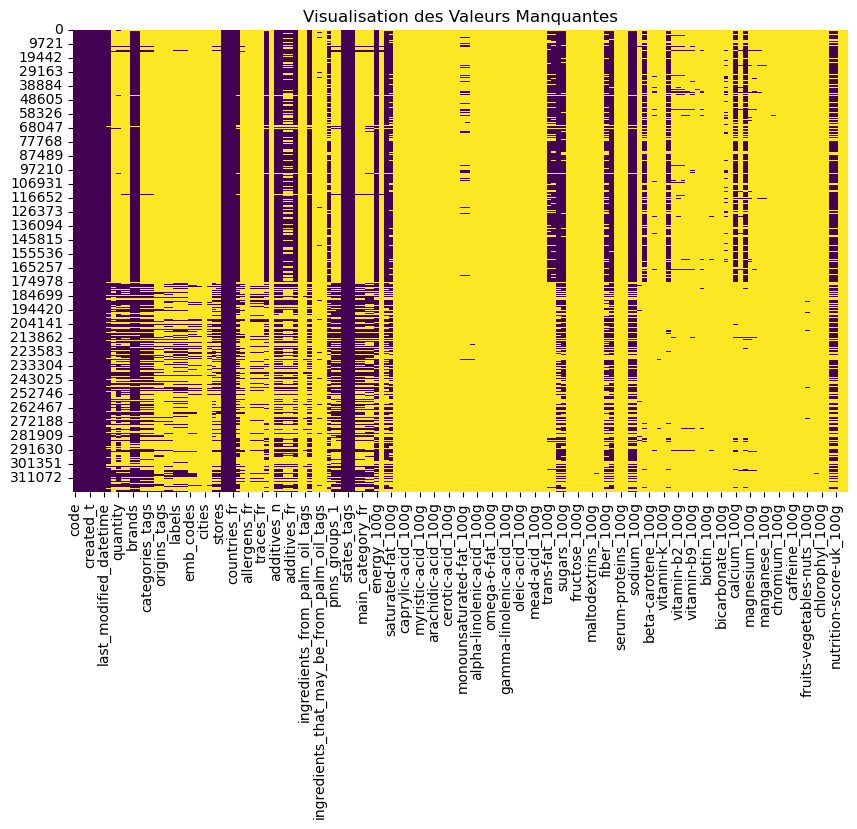

In [ ]:
fc.visualiser_valeurs_manquantes(df)

La plupart de nos colonnes comportent énormément de valeurs manquantes voir ne contient pas de données du tout.

Pour avoir un volume de données assez interessant dans le cadre de notre projet nous allons garder seulement les colonnes avec plus de 50% de données et drop le reste.

In [ ]:
# drop les colonnes de plus de 50% de valeurs manquantes
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)
df.shape

(320772, 34)

Au lieu des 162 colonnes de df initiale nous avons maintenant 34 colonnes

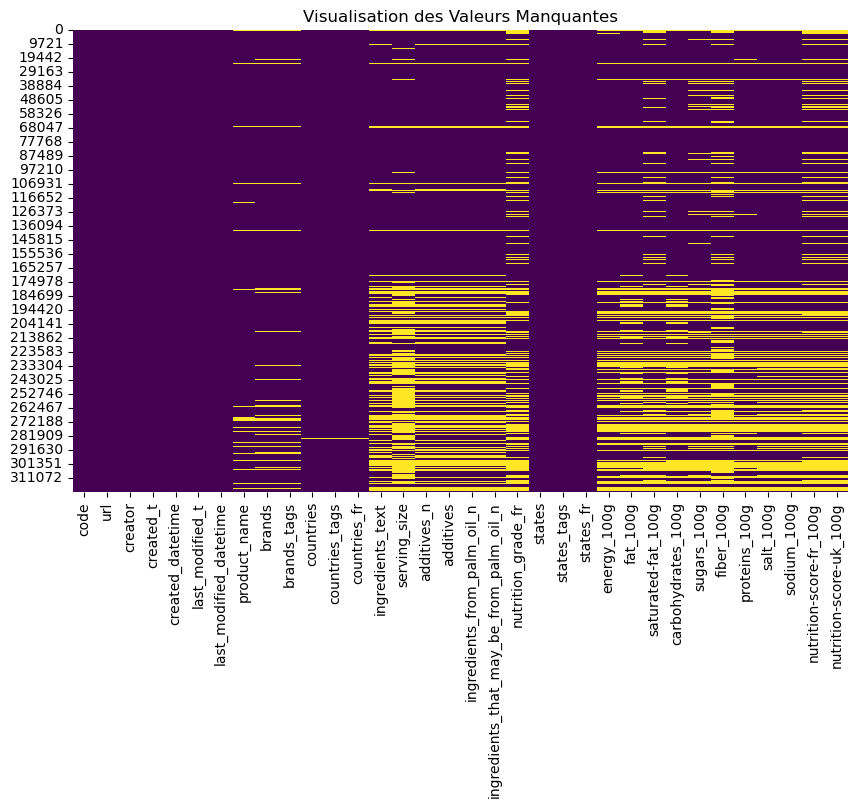

In [ ]:
fc.visualiser_valeurs_manquantes(df)

# Remplacement des valeurs manquantes

Le but va être de réaliser un code qui peut s'adapter à l'ajout ou au fait de retirer des colonnes, nous allones donc nous basé sur les types de données afin de travailler seulement sur des données qui pourront être prédites.

In [ ]:
data_num = df.select_dtypes(include='number')
data_num.head(2)

### Remplacement par la médiane

In [ ]:
df_median = data_num.fillna(data_num.median(), inplace=True)
df_median.head(2)

### Imputation de la moyenne

In [ ]:
# Remplacer les valeurs manquantes par la moyenne ou la médiane
df_moyenne = data_num.fillna(data_num.moy(), inplace=True)

### Imputation par la mode (valeur la plus fréquentes)

In [ ]:
# Remplacer les valeurs manquantes par le mode
df_mode = data_num.fillna(data_num.mode(), inplace=True)

### Remplacement grace à regression linéaire multiple

In [ ]:
from sklearn.linear_model import LinearRegression

# Séparer les données en deux ensembles
donnees_non_manquantes = df.dropna()
donnees_manquantes = df[df.isnull().any(axis=1)]

# Séparer les features et la cible
X = donnees_non_manquantes[['feature1', 'feature2', ...]]
y = donnees_non_manquantes['nutriments']

# Initialiser et entraîner le modèle de régression linéaire multiple
modele = LinearRegression()
modele.fit(X, y)

# Prédire les valeurs manquantes
valeurs_manquantes_predites = modele.predict(donnees_manquantes[['feature1', 'feature2', ...]])

# Remplacer les valeurs manquantes par les valeurs prédites
donnees_manquantes['nutriments'] = valeurs_manquantes_predites

# PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Étape 1 : Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Étape 2 : Appliquer l'ACP
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Expliquer la variance
explained_variance = pca.explained_variance_ratio_

# Anova

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Supposons que vous ayez un DataFrame pandas nommé df avec deux colonnes : 'groupe' et 'valeur'
# 'groupe' est la variable catégorielle que vous voulez comparer
# 'valeur' est la variable continue que vous voulez analyser

# Ajustez le modèle
model = ols('valeur ~ C(groupe)', data=df).fit()

# Effectuez l'ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

# test

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Supposons que df est votre DataFrame et que 'target' est votre variable cible

# Préparez vos données
X = df.dropna(subset=['target']).drop(columns='target')
y = df.dropna(subset=['target'])['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Effectuez une PCA
pca = PCA(n_components=2)  # Choisissez le nombre de composants
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Ajustez un modèle de régression linéaire multiple
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Prédisez les valeurs manquantes
predictions = model.predict(X_test_pca)

# Effectuez une ANOVA
anova_model = ols('target ~ C(group)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prédisez les valeurs sur l'ensemble de test
y_pred = model.predict(X_test_pca)

# Calculez le R²
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

# Calculez le RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

# Calculez le MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')